# 导入库

In [157]:
from netCDF4 import Dataset
from wrf import getvar
ncfile = Dataset(r"D:\data\data\wrf\sx05\wrfout_d01_2021-07-20_18_00_00")

In [158]:
ncfile.variables.items()#变量名描述

dict_items([('Times', <class 'netCDF4._netCDF4.Variable'>
|S1 Times(Time, DateStrLen)
unlimited dimensions: Time
current shape = (1, 19)
filling on, default _FillValue of   used), ('XLAT', <class 'netCDF4._netCDF4.Variable'>
float32 XLAT(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LATITUDE, SOUTH IS NEGATIVE
    units: degree_north
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 59, 69)
filling on, default _FillValue of 9.969209968386869e+36 used), ('XLONG', <class 'netCDF4._netCDF4.Variable'>
float32 XLONG(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: LONGITUDE, WEST IS NEGATIVE
    units: degree_east
    stagger: 
    coordinates: XLONG XLAT
unlimited dimensions: Time
current shape = (1, 59, 69)
filling on, default _FillValue of 9.969209968386869e+36 used), ('LU_INDEX', <class 'netCDF4._netCDF4.Variable'>
float32 LU_INDEX(Time, south_north, west_east)
    Field

In [159]:
ncfile.variables['SSTSK']#变量名 SSTSK 描述

<class 'netCDF4._netCDF4.Variable'>
float32 SSTSK(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: SKIN SEA SURFACE TEMPERATURE
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 59, 69)
filling on, default _FillValue of 9.969209968386869e+36 used

# wrf库中 getvar(ncfile,'XXX') 提取 'XXX' 变量

In [160]:
# 累计总积云对流降水量
pre_1 = getvar(ncfile, "RAINC")
pre_1

<xarray.DataArray 'RAINC' (south_north: 59, west_east: 69)>
array([[0.        , 4.5647554 , 0.7264269 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 8.917322  , 0.04217093,
        0.04345822],
       [0.        , 0.        , 0.        , ..., 8.045513  , 0.14293028,
        0.02719014],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 108.3 108.6 108.8 ... 129.9 130.2
    XLAT     (south_north, west_east) float32 23.71 23.74 23.77 ... 39.31 39.26
    XTIME    float32 720.0
    Time     datetime64[ns] 2021-07-20T18:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ACCUMULATED TOTAL CUMULUS PRECIPITATION
    units:        mm
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=118.0, moad_cen_lat=32.000011444...

In [161]:
# 累计总格点降水量
pre_2 = getvar(ncfile, "RAINNC")
pre_2

<xarray.DataArray 'RAINNC' (south_north: 59, west_east: 69)>
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7884248e+00,
        4.3130070e-03, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.4594098e-02,
        6.2357413e-04, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 108.3 108.6 108.8 ... 129.9 130.2
    XLAT     (south_north, west_east) float32 23.71 23.74 23.77 ... 39.31 39.26
    XTIME    float32 720.0
    Time     datetime64[ns] 2021-07-20T18:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  ACCUMULATED TOTAL GRID SCALE PRECIPITATION
    units:        mm
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=118.0, moad_cen_lat=32.000011444...

In [162]:
#总降水量
pre_all=pre_1+pre_2
pre_all

<xarray.DataArray (south_north: 59, west_east: 69)>
array([[ 0.        ,  4.5647554 ,  0.7264269 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., 10.705747  ,
         0.04648394,  0.04345822],
       [ 0.        ,  0.        ,  0.        , ...,  8.070107  ,
         0.14355385,  0.02719014],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 108.3 108.6 108.8 ... 129.9 130.2
    XLAT     (south_north, west_east) float32 23.71 23.74 23.77 ... 39.31 39.26
    XTIME    float32 720.0
    Time     datetime64[ns] 2021-07-20T18:00:00
Dimensions without coordinates: south_north, west_east

In [163]:
lat=getvar(ncfile,'lat')
lon=getvar(ncfile,'lon')
lat

<xarray.DataArray 'XLAT' (south_north: 59, west_east: 69)>
array([[23.706474, 23.737656, 23.76793 , ..., 23.76793 , 23.737656,
        23.706474],
       [23.965958, 23.997307, 24.027733, ..., 24.027733, 23.997307,
        23.965958],
       [24.225822, 24.25734 , 24.287918, ..., 24.287918, 24.25734 ,
        24.225822],
       ...,
       [38.715305, 38.756596, 38.796688, ..., 38.796688, 38.756596,
        38.715305],
       [38.98963 , 39.03114 , 39.071426, ..., 39.071426, 39.03114 ,
        38.98963 ],
       [39.264076, 39.305786, 39.346264, ..., 39.346264, 39.305786,
        39.264076]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 108.3 108.6 108.8 ... 129.9 130.2
    XLAT     (south_north, west_east) float32 23.71 23.74 23.77 ... 39.31 39.26
    Time     datetime64[ns] 2021-07-20T18:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      
    coordinates:  XLONG XLAT
    projection:   LambertConformal(stand_lon=118.0, moad_cen_lat=32.000011444...

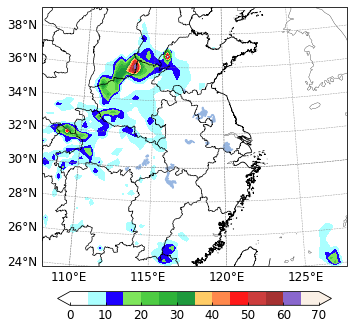

In [164]:
fig = plt.figure(figsize=(12,8))
map=ccrs.LambertConformal(central_longitude=118)
ax = fig.add_subplot(1,2,1, projection=map)
plt.rcParams['font.size']=12    #设置显示字体大小
plt.tick_params(labelsize=12)   #设置坐标轴字体大小
plt.rcParams['font.family']='DejaVu Sans'    #设置默认字体
ax.set_extent([108.3,127.6 ,23.8, 39.26],ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,lw=0.3) 
ax.add_feature(cfeature.LAKES.with_scale('50m'))
# ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
lb=ax.gridlines(draw_labels=None,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.xlocator = mticker.FixedLocator(range(0,180,10))
lb.ylocator = mticker.FixedLocator(range(0,90,10))

lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.top_labels = False
lb.right_labels = None
lb.xlocator = mticker.FixedLocator(range(105, 140, 5))
lb.ylocator = mticker.FixedLocator(range(24, 40, 2))
lb.ylabel_style = {'size': 12, 'color': 'k'}
lb.xlabel_style = {'size': 12, 'color': 'k' }
lb.rotate_labels = False
lev = np.arange(0, 72, 5)
c11=ax.contourf(lon,lat,pre_all,cmap=cmaps.prcp_1,levels=lev,zorder=0,transform=ccrs.PlateCarree(),extend='both')
cbar=plt.colorbar(c11,shrink=0.9,pad=0.06,orientation='horizontal')
cbar.ax.tick_params(labelsize=12, direction='in')

In [165]:
#地形高度
hgt=getvar(ncfile,'HGT')
(hgt)

<xarray.DataArray 'HGT' (south_north: 59, west_east: 69)>
array([[3.6219177e+02, 3.3196704e+02, 2.3637363e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.0788275e+02, 3.7089133e+02, 3.4543051e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.0926129e+02, 3.4285321e+02, 3.5080823e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7191121e+03, 1.4240552e+03, 1.1350134e+03, ..., 1.2287807e-01,
        0.0000000e+00, 0.0000000e+00],
       [1.6931511e+03, 1.6508586e+03, 1.3182954e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3522389e+03, 1.4984509e+03, 1.4005425e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 108.3 108.6 108.8 ... 129.9 130.2
    XLAT     (south_north, west_east) float32 23.71 23.74 23.77 ... 39.31 39.26
    XTIME    float32 720.0
    Time     datetime64[ns] 2021-07-20T18:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  Terrain Height
    units:        m
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=118.0, moad_cen_lat=32.000011444...

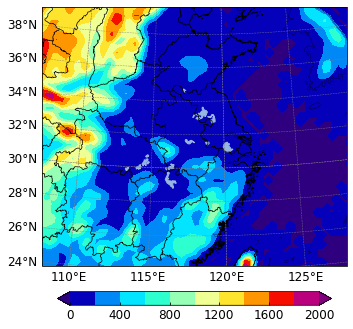

In [166]:
fig = plt.figure(figsize=(12,8))
map=ccrs.LambertConformal(central_longitude=118,central_latitude=32)
ax2 = fig.add_subplot(1,2,2, projection=map)
plt.rcParams['font.size']=12    #设置显示字体大小
plt.tick_params(labelsize=12)   #设置坐标轴字体大小
plt.rcParams['font.family']='DejaVu Sans'    #设置默认字体
ax2.set_extent([108.3,127.6 ,23.8, 39.26],ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE,lw=0.3) 
ax2.add_feature(cfeature.LAKES.with_scale('50m'))
# ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
ax2.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
lb=ax2.gridlines(draw_labels=None,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.xlocator = mticker.FixedLocator(range(0,180,10))
lb.ylocator = mticker.FixedLocator(range(0,90,10))

lb=ax2.gridlines(draw_labels=True,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.top_labels = False
lb.right_labels = None
lb.xlocator = mticker.FixedLocator(range(105, 140, 5))
lb.ylocator = mticker.FixedLocator(range(24, 40, 2))
lb.ylabel_style = {'size': 12, 'color': 'k'}
lb.xlabel_style = {'size': 12, 'color': 'k' }
lb.rotate_labels = False
lev = np.arange(0, 2005, 200)
c11=ax2.contourf(lon,lat,hgt,cmap=cmaps.NCV_jaisnd,levels=lev,zorder=0,transform=ccrs.PlateCarree(),extend='both')
cbar=plt.colorbar(c11,shrink=0.9,pad=0.06,orientation='horizontal')
cbar.ax.tick_params(labelsize=12, direction='in')

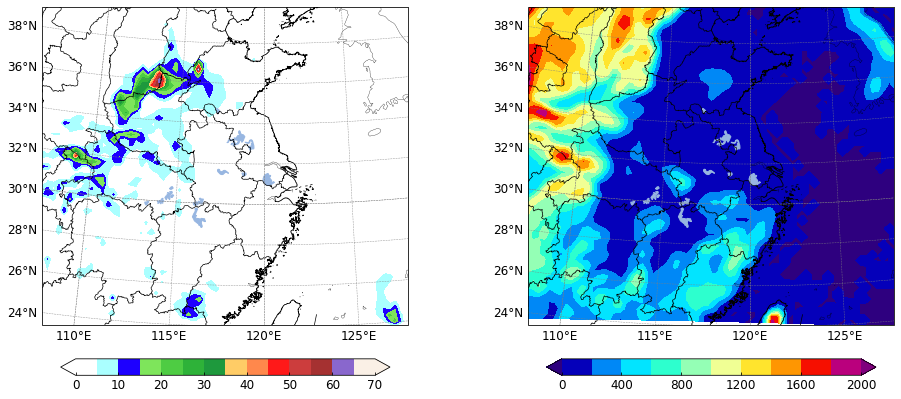

In [168]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import cmaps
fig = plt.figure(figsize=(12,8))
map=ccrs.LambertConformal(central_longitude=120)
ax = fig.add_subplot(1,2,1, projection=map)
#ax=fig.add_axes([0.1, 0.1, 0.5, 0.3],projection=map)

plt.rcParams['font.size']=12    #设置显示字体大小
plt.tick_params(labelsize=12)   #设置坐标轴字体大小
plt.rcParams['font.family']='DejaVu Sans'    #设置默认字体
ax.set_extent([108.3,127.6 ,23.8, 39.26],ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,lw=0.3) 
ax.add_feature(cfeature.LAKES.with_scale('50m'))
# ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
lb=ax.gridlines(draw_labels=None,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.xlocator = mticker.FixedLocator(range(0,180,10))
lb.ylocator = mticker.FixedLocator(range(0,90,10))

lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.top_labels = False
lb.right_labels = None
lb.xlocator = mticker.FixedLocator(range(105, 140, 5))
lb.ylocator = mticker.FixedLocator(range(24, 40, 2))
lb.ylabel_style = {'size': 12, 'color': 'k'}
lb.xlabel_style = {'size': 12, 'color': 'k' }
lb.rotate_labels = False
lev = np.arange(0, 72, 5)
c11=ax.contourf(lon,lat,pre_all,cmap=cmaps.prcp_1,levels=lev,zorder=0,transform=ccrs.PlateCarree(),extend='both')
cbar=plt.colorbar(c11,shrink=0.9,pad=0.06,orientation='horizontal')
cbar.ax.tick_params(labelsize=12, direction='in')

ax2 = fig.add_subplot(1,2,2, projection=map)
#ax=fig.add_axes([0.1, 0.1, 0.5, 0.3],projection=map)

plt.rcParams['font.size']=12    #设置显示字体大小
plt.tick_params(labelsize=12)   #设置坐标轴字体大小
plt.rcParams['font.family']='DejaVu Sans'    #设置默认字体
ax2.set_extent([108.3,127.6 ,23.8, 39.26],ccrs.PlateCarree())
ax2.add_feature(cfeature.COASTLINE,lw=0.3) 
ax2.add_feature(cfeature.LAKES.with_scale('50m'))
# ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
ax2.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
# ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
lb=ax2.gridlines(draw_labels=None,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.xlocator = mticker.FixedLocator(range(0,180,10))
lb.ylocator = mticker.FixedLocator(range(0,90,10))

lb=ax2.gridlines(draw_labels=True,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
lb.top_labels = False
lb.right_labels = None
lb.xlocator = mticker.FixedLocator(range(105, 140, 5))
lb.ylocator = mticker.FixedLocator(range(24, 40, 2))
lb.ylabel_style = {'size': 12, 'color': 'k'}
lb.xlabel_style = {'size': 12, 'color': 'k' }
lb.rotate_labels = False
lev = np.arange(0, 2005, 200)
c12=ax2.contourf(lon,lat,hgt,cmap=cmaps.NCV_jaisnd,levels=lev,zorder=0,transform=ccrs.PlateCarree(),extend='both')
cbar2=plt.colorbar(c12,shrink=0.9,pad=0.06,orientation='horizontal')
cbar2.ax.tick_params(labelsize=12, direction='in')
plt.tight_layout(pad=0.5, w_pad=10, h_pad=2)
plt.show()

In [169]:

def LBT_map(ax,lon,lat,data,cmap,lev):

    ax.set_extent([108.3,127.6 ,23.8, 39.26],ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE,lw=0.3) 
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    # ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.5)
    # ax.add_geometries(Reader(r'D:\data\china_ma    p\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.7)
    # ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
    # ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.5)
    lb=ax.gridlines(draw_labels=None,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
    lb.xlocator = mticker.FixedLocator(range(0,180,10))
    lb.ylocator = mticker.FixedLocator(range(0,90,10))
    
    lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,linewidth=0.5, color='gray', alpha=0.8, linestyle='--' )
    lb.top_labels = False
    lb.right_labels = None
    lb.xlocator = mticker.FixedLocator(range(105, 140, 5))
    lb.ylocator = mticker.FixedLocator(range(24, 40, 2))
    lb.ylabel_style = {'size': 12, 'color': 'k'}
    lb.xlabel_style = {'size': 12, 'color': 'k' }
    lb.rotate_labels = False
    
    c11=ax.contourf(lon,lat,data,cmap=cmap,levels=lev,zorder=0,transform=ccrs.PlateCarree(),extend='both')
    cbar=plt.colorbar(c11,shrink=0.9,pad=0.06,orientation='horizontal')
    cbar.ax.tick_params(labelsize=12, direction='in')

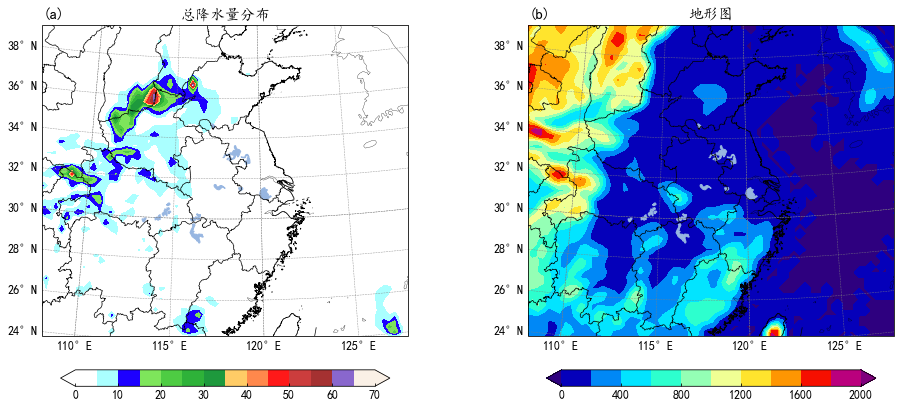

In [170]:
import matplotlib
#防止中文出错
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(12,8))
map=ccrs.LambertConformal(central_longitude=118,central_latitude=32)
ax1 = fig.add_subplot(1,2,1, projection=map)
lev_pre = np.arange(0, 72, 5)
LBT_map(ax1,lon,lat,pre_all,cmaps.prcp_1,lev_pre)
ax1.set_title('总降水量分布', fontsize=15)
ax1.set_title('(a)', loc='left', fontsize=15)

ax2 = fig.add_subplot(1,2,2, projection=map)
lev_hgt = np.arange(0, 2005, 200)
LBT_map(ax2,lon,lat,hgt,cmaps.NCV_jaisnd,lev_hgt)
ax2.set_title('地形图', fontsize=15)
ax2.set_title('(b)', loc='left', fontsize=15)

plt.tight_layout(pad=0.5, w_pad=10, h_pad=2)
plt.show()

# 完整代码

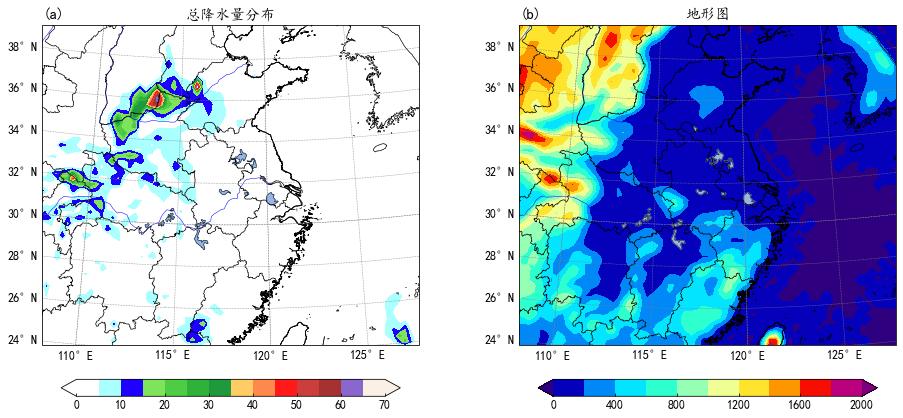

In [2]:
from netCDF4 import Dataset
from wrf import getvar
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import cmaps
import matplotlib
#防止中文出错
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False
ncfile = Dataset(r"D:\data\data\wrf\sx05\wrfout_d01_2021-07-20_18_00_00")
# 累计总积云对流降水量
pre_1 = getvar(ncfile, "RAINC")
# 累计总格点降水量
pre_2 = getvar(ncfile, "RAINNC")
#总降水量
pre_all = pre_1 + pre_2

lat = getvar(ncfile, 'lat')
lon = getvar(ncfile, 'lon')

#地形高度
hgt = getvar(ncfile, 'HGT')


def LBT_map(ax, lon, lat, data, cmap, lev):

    ax.set_extent([108.3, 127.6, 23.8, 39.26], ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, lw=0.3)
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    ax.add_geometries(Reader(r"D:\data\china_map\river1.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='b',
                      linewidth=0.5)
    ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.5)
    ax.add_geometries(Reader(r"D:\data\map\bou2_4l.shp").geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.7)
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.5)
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.5)
    lb = ax.gridlines(draw_labels=None,
                      x_inline=False,
                      y_inline=False,
                      linewidth=0.5,
                      color='gray',
                      alpha=0.8,
                      linestyle='--')
    lb.xlocator = mticker.FixedLocator(range(0, 180, 10))
    lb.ylocator = mticker.FixedLocator(range(0, 90, 10))

    lb = ax.gridlines(draw_labels=True,
                      x_inline=False,
                      y_inline=False,
                      linewidth=0.5,
                      color='gray',
                      alpha=0.8,
                      linestyle='--')
    lb.top_labels = False
    lb.right_labels = None
    lb.xlocator = mticker.FixedLocator(range(105, 140, 5))
    lb.ylocator = mticker.FixedLocator(range(24, 40, 2))
    lb.ylabel_style = {'size': 12, 'color': 'k'}
    lb.xlabel_style = {'size': 12, 'color': 'k'}
    lb.rotate_labels = False

    c11 = ax.contourf(lon,
                      lat,
                      data,
                      cmap=cmap,
                      levels=lev,
                      zorder=0,
                      transform=ccrs.PlateCarree(),
                      extend='both')
    cbar = plt.colorbar(c11, shrink=0.9, pad=0.06, orientation='horizontal')
    cbar.ax.tick_params(labelsize=12, direction='in')


fig = plt.figure(figsize=(12, 8))
map = ccrs.LambertConformal(central_longitude=118, central_latitude=32)
ax1 = fig.add_subplot(1, 2, 1, projection=map)
lev_pre = np.arange(0, 72, 5)
LBT_map(ax1, lon, lat, pre_all, cmaps.prcp_1, lev_pre)
ax1.set_title('总降水量分布', fontsize=15)
ax1.set_title('(a)', loc='left', fontsize=15)

ax2 = fig.add_subplot(1, 2, 2, projection=map)
lev_hgt = np.arange(0, 2005, 200)
LBT_map(ax2, lon, lat, hgt, cmaps.NCV_jaisnd, lev_hgt)
ax2.set_title('地形图', fontsize=15)
ax2.set_title('(b)', loc='left', fontsize=15)

plt.tight_layout(pad=0.5, w_pad=10, h_pad=2)
plt.savefig(r"D:\data\data\wrf\sx05\pre.jpg", dpi=300, bbox_inches='tight')
plt.show()